In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')  #/content/drive/MyDrive/Final Year Research/data/new_smoter_garments_worker_productivity.csv

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# change the data types
# data['no_of_style_change'] = data['no_of_style_change']
data['team'] = data['team'].astype(str)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

# Mispell corrections
data = data.replace(['finishing '], ['finishing'])
data = data.replace(['sweing'], ['sewing'])

# replacing null values
data['wip'].fillna(0 ,inplace=True)

# outlier correction
data.loc[data['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
data.loc[data['no_of_workers'] == 89, 'no_of_workers'] = 35
data = data.drop(['date'], axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 131.0+ 

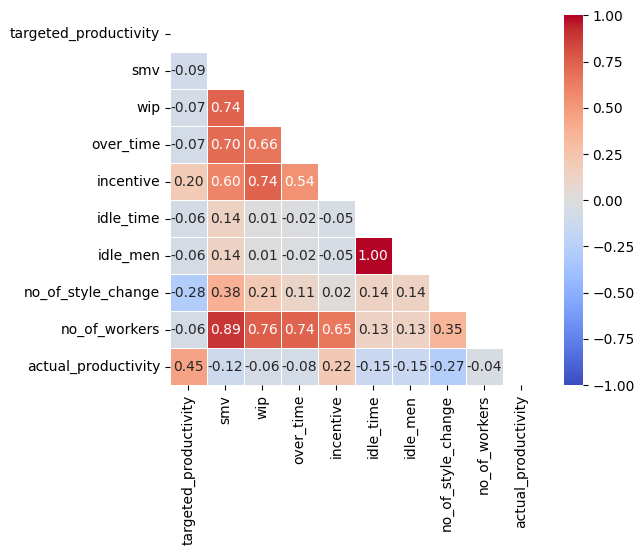

In [ ]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical = [feature for feature in data.columns if data[feature].dtype == 'O']

mask = np.triu(np.ones_like(data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

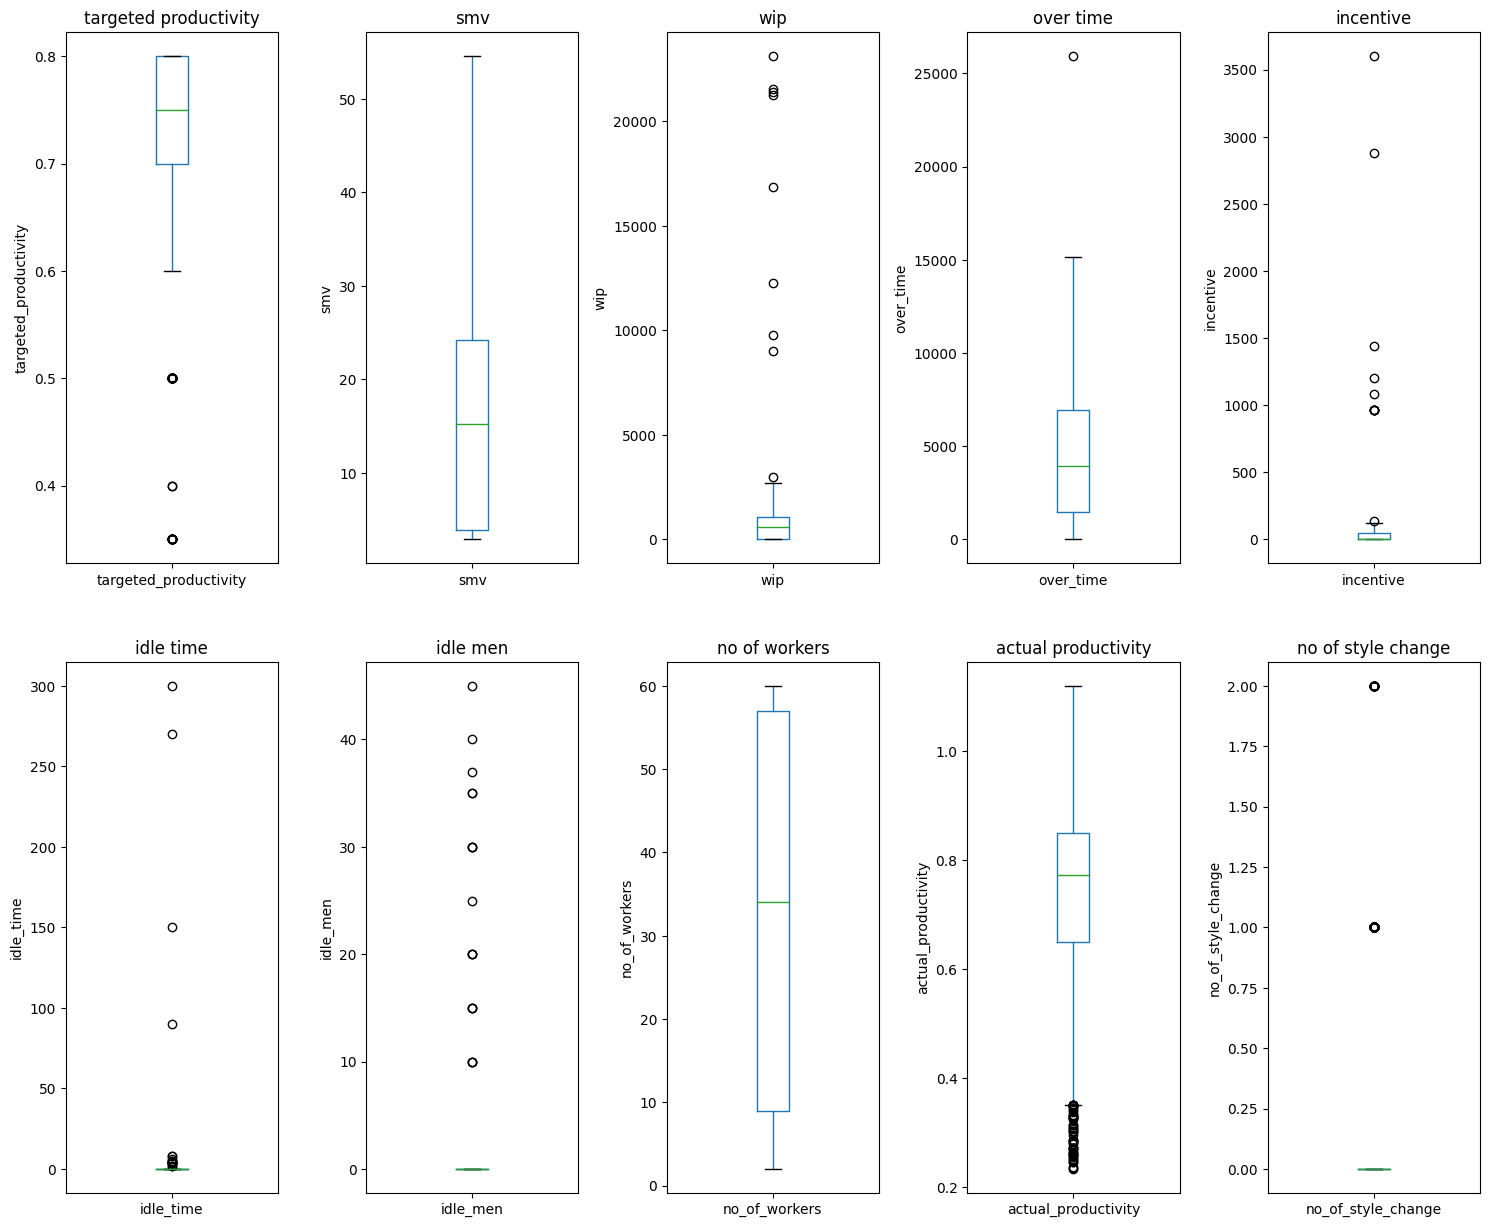

In [ ]:
categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity', 'no_of_style_change']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=2, ncols=5,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
new_data = data.copy()
for column in numerical:
    new_data = remove_outliers_iqr(new_data, column)

# Reset index
new_data = new_data.reset_index(drop=True)

# Display the dataset without outliers
new_data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,Quarter2,sewing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59,0.750051
901,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628333
902,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.625625
903,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.625625


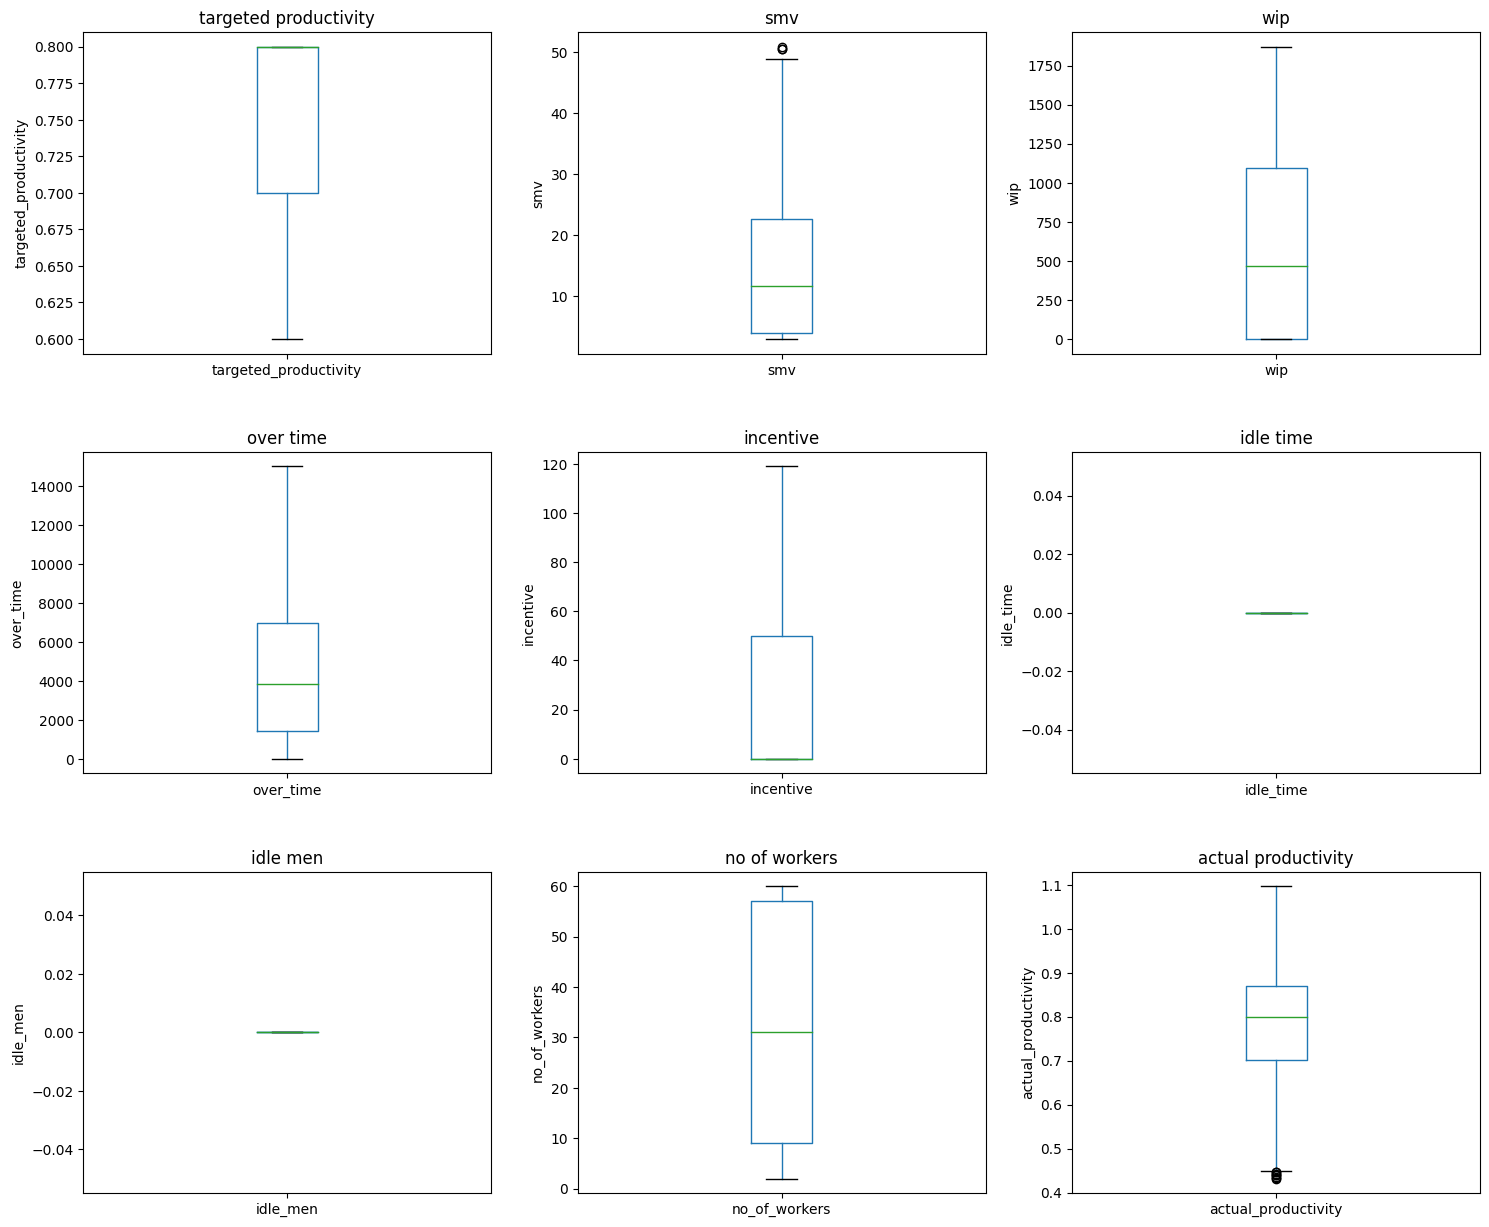

In [ ]:
# categorical = ["quarter", "department", "day", "team"]
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
new_data.duplicated().sum()

0

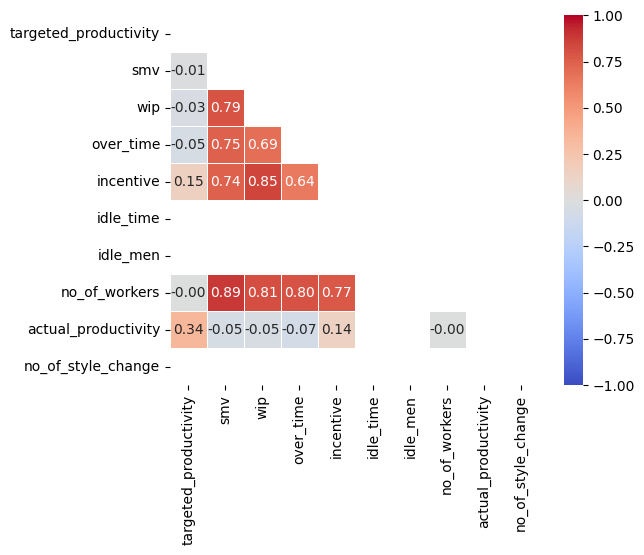

In [ ]:
mask = np.triu(np.ones_like(new_data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(new_data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                905 non-null    object 
 1   department             905 non-null    object 
 2   day                    905 non-null    object 
 3   team                   905 non-null    object 
 4   targeted_productivity  905 non-null    float64
 5   smv                    905 non-null    float64
 6   wip                    905 non-null    float64
 7   over_time              905 non-null    int64  
 8   incentive              905 non-null    int64  
 9   idle_time              905 non-null    float64
 10  idle_men               905 non-null    int64  
 11  no_of_style_change     905 non-null    int64  
 12  no_of_workers          905 non-null    int64  
 13  actual_productivity    905 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 99.1+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## Machine Learning Models

In [ ]:
categorical_cols = ['quarter', 'department', 'day', 'team']
numerical_cols = ['targeted_productivity','smv' , 'wip', 'over_time', 'incentive', 'no_of_style_change']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(new_data[categorical_cols])

# Scale numerical columns
scaler = StandardScaler()
numerical_data = scaler.fit_transform(new_data[numerical_cols])

# Combine encoded categorical and scaled numerical data
X = np.concatenate([categorical_data, numerical_data], axis=1)
y = new_data['actual_productivity']

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Lasso": Lasso(alpha= 0.001),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1053
- Mean Absolute Error: 0.0755
- R2 Score: 0.3441
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0948
- Mean Absolute Error: 0.0663
- R2 Score: 0.2949


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1043
- Mean Absolute Error: 0.0752
- R2 Score: 0.3557
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0941
- Mean Absolute Error: 0.0682
- R2 Score: 0.3055


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0813
- Mean Absolute Error: 0.0542
- R2 Score: 0.6090
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0951
- Mean Absolute Error: 0.0604
- R2 Score: 0.2901


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0107
- Mean Absolute Error: 0.0009
- R2 Score: 0.9933
---------------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.412013
4,Random Forest Regressor,0.411504
1,Ridge,0.305498
0,Lasso,0.294946
2,K-Neighbors Regressor,0.290141
7,AdaBoost Regressor,0.274560
5,XGBRegressor,0.247786
3,Decision Tree,-0.177197


In [ ]:
# # finetune the parameters of the random forest regressor

# cat_regressor = CatBoostRegressor(
#     learning_rate = 0.1,
#     iterations = 100,
#     depth=8,  # Adjust the tree depth
#     # l2_leaf_reg=2,  # Adjust the L2 regularization
#     # bootstrap_type='MVS',  # Adjust the bootstrap type
#     # subsample=0.8,  # Adjust the subsample ratio
#     # scale_pos_weight=1,  # Adjust the scale_pos_weight
#     loss_function='MAE',  # Adjust the evaluation metric
# )

# cat_regressor = CatBoostRegressor(
#     iterations=1000,
#     learning_rate=0.1,
#     l2_leaf_reg=0,
#     # l1_leaf_reg=0.5,
#     loss_function='RMSE'
# )

cat_regressor = XGBRegressor(
      reg_alpha=0.4,  # L1 regularization
      # reg_lambda=0.5  # L2 regularization
      n_estimators = 100,
      max_depth =4,
      learning_rate = 0.1,
      # subsample = 1.0,
    # 'colsample_bytree': [0.8, 0.9, 1.0]
)

cat_regressor.fit(X_train, y_train)

y_train_pred_CBR = cat_regressor.predict(X_train)
y_test_pred_CBR = cat_regressor.predict(X_test)

model_train_mae_CBR , model_train_rmse_CBR, model_train_r2_CBR = model_evaluation(y_train, y_train_pred_CBR)
model_test_mae_CBR , model_test_rmse_CBR, model_test_r2_CBR = model_evaluation(y_test, y_test_pred_CBR)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_CBR))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_CBR))
print("- R2 Score: {:.4f}".format(model_train_r2_CBR))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_CBR))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_CBR))
print("- R2 Score: {:.4f}".format(model_test_r2_CBR))

# Model performance for Training set
# - Root Mean Squared Error: 0.0564
# - Mean Absolute Error: 0.0370
# - R2 Score: 0.9207

# Model performance for Testing set
# - Root Mean Squared Error: 0.0969
# - Mean Absolute Error: 0.0637
# - R2 Score: 0.7635

Model performance for Training set
- Root Mean Squared Error: 0.0760
- Mean Absolute Error: 0.0505
- R2 Score: 0.6581

Model performance for Testing set
- Root Mean Squared Error: 0.0825
- Mean Absolute Error: 0.0515
- R2 Score: 0.4660


In [ ]:
test_prediction = pd.DataFrame(list(zip(y_test, y_test_pred_CBR)), columns=['y_test', 'y_prediction'])
train_prediction = pd.DataFrame(list(zip(y_train, y_train_pred_CBR)), columns=['y_train', 'y_train_prediction'])
# train_prediction

In [ ]:
test_prediction['diff'] = test_prediction['y_test'] - test_prediction['y_prediction']

In [ ]:
len(test_prediction.loc[(test_prediction['diff'] > 0.1) | (test_prediction['diff'] < -0.1)])

30

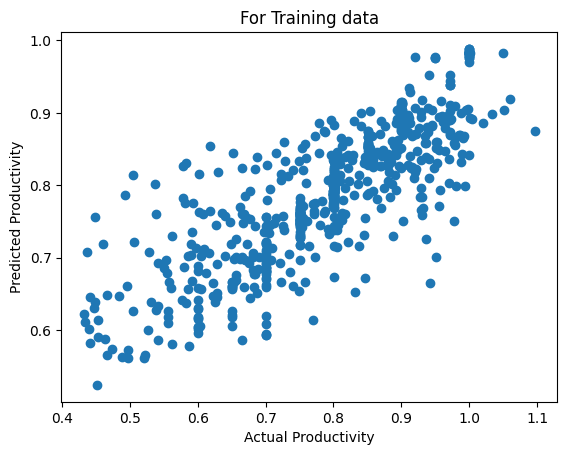

In [ ]:
plt.scatter(train_prediction['y_train'], train_prediction['y_train_prediction'])
plt.title('For Training data')
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.show()

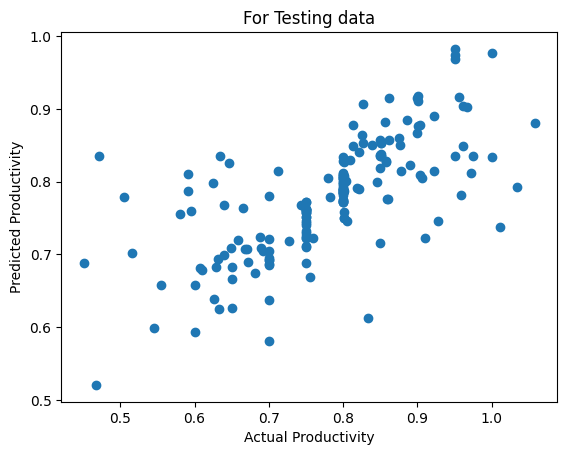

In [ ]:
plt.scatter(test_prediction['y_test'], test_prediction['y_prediction'])
plt.title('For Testing data')
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.show()

In [ ]:
# prompt: need k-fold cross validation technique for catboostregressor to improve the model preformance

from sklearn.model_selection import KFold, cross_val_score

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Adjust n_splits as needed

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=False)

# Perform cross-validation
scores = cross_val_score(catboost_model, X, y, cv=kf, scoring='r2')

# Print cross-validation scores
print("Cross-validation R2 scores:", scores)
print("Average R2 score:", scores.mean())

# Fit the model on the entire dataset (optional, if you want to use it for further predictions)
catboost_model.fit(X, y)


Cross-validation R2 scores: [0.28242064 0.64197026 0.4790287  0.51580366 0.56212321 0.36752904
 0.4982125  0.24731249 0.4546308  0.38871731]
Average R2 score: 0.44377486152630546


In [ ]:
# # finetune the parameters of the random forest regressor

random_forest_regressor = RandomForestRegressor(n_estimators=150)
random_forest_regressor.fit(X_train, y_train)

y_train_pred_RFR = random_forest_regressor.predict(X_train)
y_test_pred_RFR= random_forest_regressor.predict(X_test)

model_train_mae_RFR, model_train_rmse_RFR, model_train_r2_RFR = model_evaluation(y_train, y_train_pred_RFR)
model_test_mae_RFR , model_test_rmse_RFR, model_test_r2_RFR = model_evaluation(y_test, y_test_pred_RFR)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_RFR))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_RFR))
print("- R2 Score: {:.4f}".format(model_train_r2_RFR))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_RFR))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_RFR))
print("- R2 Score: {:.4f}".format(model_test_r2_RFR))

# Model performance for Training set
# - Root Mean Squared Error: 0.0564
# - Mean Absolute Error: 0.0370
# - R2 Score: 0.9207

# Model performance for Testing set
# - Root Mean Squared Error: 0.0969
# - Mean Absolute Error: 0.0637
# - R2 Score: 0.7635

Model performance for Training set
- Root Mean Squared Error: 0.0382
- Mean Absolute Error: 0.0239
- R2 Score: 0.9135

Model performance for Testing set
- Root Mean Squared Error: 0.0893
- Mean Absolute Error: 0.0512
- R2 Score: 0.3732
